In [54]:
%pylab
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [55]:
fs = 44100  # sampling rate
baud = 300  # symbol rate
len_preamble = 10
len_data = 10  # number of bits
len_packet =  len_preamble + len_data
Ns = fs/baud
N = len_packet * Ns
f0 = int(88.1e6)
preamble = np.array([[True] if i % 2 == 0 else [False] for i in range(len_preamble)])
data = randn(len_data,1) > 0
bits = np.concatenate((preamble, data))
manchester = np.array([[False, True] if b else [True, False] for b in bits])
manchester = np.reshape(manchester, (-1, 1))

output = []
for b in bits:
    if b:
        output.append(1)
    else:
        output.append(0)
print(output)


[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1]


Text(0.5,0,'time [s]')

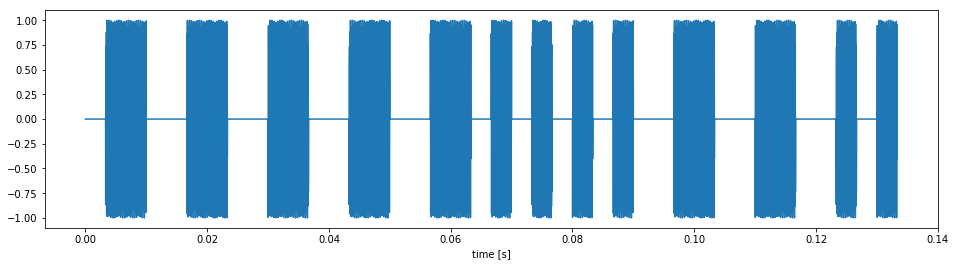

In [56]:
M = np.tile(manchester,(1,int(Ns)))
t = r_[0.0:2*N]/fs
OOK = M.ravel()*np.sin(2*np.pi*f0*t)

fig = figure(figsize = (16,4))
plot(t,OOK)
xlabel('time [s]')

In [58]:
sd.play(OOK, blocking=True)